SVM最適化の目的：マージンを最大化すること
* マージン：超平面（決定境界）と、この超平面に最も近いトレーニングサンプルの間の距離
* サポートベクトル：超平面に最も近いトレーニングサンプル

### 超平面

$$ w_0 + {\boldsymbol w^Tx_{pos}} = 1 $$
$$ w_0 + {\boldsymbol w^Tx_{neg}} = -1 $$
引き算して
$$　{\boldsymbol w^T(x_{pos} - x_{neg}}) = 2 $$
ベクトルの長さを以下のように定義する
$$　{\boldsymbol ||w||} = \sqrt{\sum_{j=1}^m w_j^2} $$
上2式から長さで割って標準化すると

$$　\frac{{\boldsymbol w^T(x_{pos} - x_{neg}})}{{\boldsymbol ||w||}} = \frac{2}{{\boldsymbol ||w||}} $$
左辺は性の超平面と負の超平面の距離 -> 最大化したいマージン

つまり、\\(　\frac{2}{{\boldsymbol ||w||}}  \\)の最大化がマージン最大化の問題である。

正のサンプルはすべて正の超平面の後ろに収まる。
$$ w_0 + {\boldsymbol w^Tx^{(i)}} \geq 1 (y^{(i)} = 1)$$
負のサンプルはすべて負の超平面の側にある。
$$ w_0 + {\boldsymbol w^Tx^{(i)}} < -1 (y^{(i)} = -1)$$



実際は、\\(　\frac{2}{{\boldsymbol ||w||}}  \\)の最大化ではなく逆数の二乗\\(　\frac{{\boldsymbol ||w||}^2}{2}  \\)の最小化の方が簡単。二次計画法により解くことができる。

### スラック変数を使った非線形分離可能なケース
$$ {\boldsymbol w^Tx^{(i)}} \geq 1 - \xi^{(i)}\; (y^{(i)} = 1)$$
$$ {\boldsymbol w^Tx^{(i)}} < -1 + \xi^{(i)}\; (y^{(i)} = -1)$$

最小化すべき新しい対象は下記のとおり

$$　\frac{1}{2}{\boldsymbol ||w||^2} = C({\sum_{i}\xi^{(i)}}) $$

In [3]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Irisデータセットをロード
iris = datasets.load_iris()
# 3,4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
# print('Class labels:', np.unique(y))

# テストデータの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 特徴量のスケーリング
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [6]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

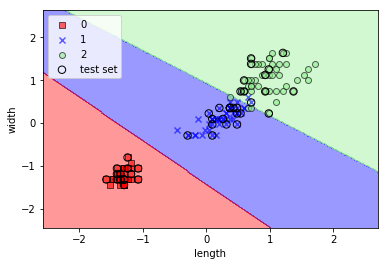

In [7]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('length')
plt.ylabel('width')
plt.legend(loc='upper left')
plt.show()